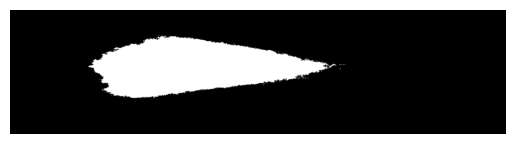

In [1]:
from PIL import Image
import matplotlib.pyplot as plt
from PIL import Image, ImageOps
import torchvision.transforms.functional as TF

path = r'/teamspace/studios/this_studio/BubbleSegmentation/Data/Label_Test_2023April7/t3Label100_738983_3.png'  
img = Image.open(path)

img = img.convert('L')  # Grayscale, 1-channel
plt.imshow(img, cmap='gray')
plt.axis('off')
plt.show()


In [29]:
img.size

(1024, 256)

In [7]:
def compute_area(mask):
    return (mask == 1).sum().item()

img_tensor = TF.to_tensor(img)  
binary_mask = (img_tensor > 0.5).long()  # 0.5 threshold works for [0,1] float images

print("img ablation area:", compute_area(img_tensor)*0.0025)
print("img ablation area:", compute_area(binary_mask)*0.0025)

img ablation area: 188.42000000000002
img ablation area: 194.25


In [4]:
import torch
print(torch.unique(binary_mask))

tensor([0, 1])


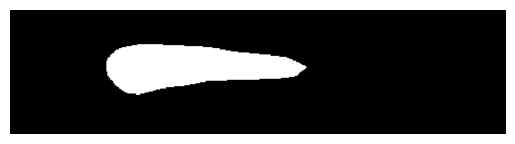

In [5]:
pred_path = r'/teamspace/studios/this_studio/BubbleSegmentation/code_files/test_results/TorchvisionDeepLabV3_DiceFocalWithPulsePriorLoss_Dice0.55_Tversky0.5_Focal0.55_Epochs10_LR0.0003/only_predictions/t3Label100_738983_3.png'
pred = Image.open(pred_path)
pred = pred.convert('L')  # Grayscale, 1-channel
plt.imshow(pred, cmap='gray')
plt.axis('off')
plt.show()

In [6]:

pred_tensor = TF.to_tensor(pred)

print("pred ablation area:", compute_area(pred_tensor)*0.0025)

pred ablation area: 69.35000000000001
